## Data Preprocessing

### Separate the input and output columns

In [1]:
import pandas as pd

data = pd.read_csv("area_under_curve.csv")
data.head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,Label
0,15039.506465,192.304141,4580.859508,15470.615822,16691.119731,-3586.964009,9284.025365,12367.489225,34891.457559,2638.623057,...,24787.849638,35763.898486,-1747.031767,18749.896503,21732.841485,30719.019539,-10818.298721,16474.820511,14927.852165,1
1,10698.625832,371.979002,0.000000,11025.378364,9271.735896,-1652.314348,0.000000,10209.872864,15953.995620,1856.581932,...,20423.143734,14964.290933,-1823.978920,0.000000,18542.382053,8423.747544,-7612.025102,0.000000,12953.333059,1
2,16534.748315,13721.976544,0.000000,16037.723281,12865.616055,6852.139323,0.000000,13717.479341,18997.544880,6561.197358,...,18634.975971,20028.162076,1809.677702,0.000000,18460.828581,17103.865983,-2654.522842,0.000000,13687.488937,0
3,12594.424822,4492.685913,5852.225505,12014.939539,8925.003742,-1171.472328,2906.952260,9373.242809,15403.021595,3976.963293,...,22992.677781,13524.116260,3582.541148,2357.349428,19568.087452,8960.828237,-244.490676,-85.567083,14361.510170,1
4,15139.205869,11060.918923,0.000000,14754.730356,11394.833455,2688.208500,0.000000,13389.468519,15612.740116,5059.636844,...,20502.861310,13923.317864,4707.935541,0.000000,16378.049614,9513.526348,346.741274,0.000000,11284.803584,0


### Median imputation

In [2]:
def replace_zeros_with_median(df, label_column):
    """Function to replace 0s with median for each column based on the label"""
    
    for column in df.columns:
        # calculate median for each label group
        median_values = df.groupby(label_column)[column].median()

        # replace 0s with median based on the label of each row
        df[column] = df.apply(lambda row: median_values[row[label_column]] if row[column] == 0 else row[column], axis=1)

    return df

In [3]:
data = replace_zeros_with_median(data, "Label")
data.head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,Label
0,15039.506465,192.304141,4580.859508,15470.615822,16691.119731,-3586.964009,9284.025365,12367.489225,34891.457559,2638.623057,...,24787.849638,35763.898486,-1747.031767,18749.896503,21732.841485,30719.019539,-10818.298721,16474.820511,14927.852165,1.0
1,10698.625832,371.979002,10611.265447,11025.378364,9271.735896,-1652.314348,3761.048147,10209.872864,15953.995620,1856.581932,...,20423.143734,14964.290933,-1823.978920,2903.246128,18542.382053,8423.747544,-7612.025102,-232.061855,12953.333059,1.0
2,16534.748315,13721.976544,7233.162447,16037.723281,12865.616055,6852.139323,4152.945713,13717.479341,18997.544880,6561.197358,...,18634.975971,20028.162076,1809.677702,1057.621655,18460.828581,17103.865983,-2654.522842,0.000000,13687.488937,0.0
3,12594.424822,4492.685913,5852.225505,12014.939539,8925.003742,-1171.472328,2906.952260,9373.242809,15403.021595,3976.963293,...,22992.677781,13524.116260,3582.541148,2357.349428,19568.087452,8960.828237,-244.490676,-85.567083,14361.510170,1.0
4,15139.205869,11060.918923,7233.162447,14754.730356,11394.833455,2688.208500,4152.945713,13389.468519,15612.740116,5059.636844,...,20502.861310,13923.317864,4707.935541,1057.621655,16378.049614,9513.526348,346.741274,0.000000,11284.803584,0.0


In [4]:
selected_columns = [
    'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
    'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10',
    'Alpha_TP9', 'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10',
    'Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10',
    'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10'
]

X = data.loc[:, selected_columns]
X.head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_AF8,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10
0,15039.506465,192.304141,4580.859508,15470.615822,16691.119731,-3586.964009,9284.025365,12367.489225,34891.457559,2638.623057,10377.992349,24787.849638,35763.898486,-1747.031767,18749.896503,21732.841485,30719.019539,-10818.298721,16474.820511,14927.852165
1,10698.625832,371.979002,10611.265447,11025.378364,9271.735896,-1652.314348,3761.048147,10209.872864,15953.995620,1856.581932,5140.426448,20423.143734,14964.290933,-1823.978920,2903.246128,18542.382053,8423.747544,-7612.025102,-232.061855,12953.333059
2,16534.748315,13721.976544,7233.162447,16037.723281,12865.616055,6852.139323,4152.945713,13717.479341,18997.544880,6561.197358,3976.212778,18634.975971,20028.162076,1809.677702,1057.621655,18460.828581,17103.865983,-2654.522842,0.000000,13687.488937
3,12594.424822,4492.685913,5852.225505,12014.939539,8925.003742,-1171.472328,2906.952260,9373.242809,15403.021595,3976.963293,3899.183949,22992.677781,13524.116260,3582.541148,2357.349428,19568.087452,8960.828237,-244.490676,-85.567083,14361.510170
4,15139.205869,11060.918923,7233.162447,14754.730356,11394.833455,2688.208500,4152.945713,13389.468519,15612.740116,5059.636844,3976.212778,20502.861310,13923.317864,4707.935541,1057.621655,16378.049614,9513.526348,346.741274,0.000000,11284.803584


In [5]:
# For y, we have either 0 or 1. 
# 0 = "Recall"
# 1 = "Maze"

y = data.iloc[:, -1]
y.head()

0    1.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Label, dtype: float64

### Removing rows with missing data

In [6]:
X_cleaned = X.dropna()
X_cleaned.head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_AF8,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10
0,15039.506465,192.304141,4580.859508,15470.615822,16691.119731,-3586.964009,9284.025365,12367.489225,34891.457559,2638.623057,10377.992349,24787.849638,35763.898486,-1747.031767,18749.896503,21732.841485,30719.019539,-10818.298721,16474.820511,14927.852165
1,10698.625832,371.979002,10611.265447,11025.378364,9271.735896,-1652.314348,3761.048147,10209.872864,15953.995620,1856.581932,5140.426448,20423.143734,14964.290933,-1823.978920,2903.246128,18542.382053,8423.747544,-7612.025102,-232.061855,12953.333059
2,16534.748315,13721.976544,7233.162447,16037.723281,12865.616055,6852.139323,4152.945713,13717.479341,18997.544880,6561.197358,3976.212778,18634.975971,20028.162076,1809.677702,1057.621655,18460.828581,17103.865983,-2654.522842,0.000000,13687.488937
3,12594.424822,4492.685913,5852.225505,12014.939539,8925.003742,-1171.472328,2906.952260,9373.242809,15403.021595,3976.963293,3899.183949,22992.677781,13524.116260,3582.541148,2357.349428,19568.087452,8960.828237,-244.490676,-85.567083,14361.510170
4,15139.205869,11060.918923,7233.162447,14754.730356,11394.833455,2688.208500,4152.945713,13389.468519,15612.740116,5059.636844,3976.212778,20502.861310,13923.317864,4707.935541,1057.621655,16378.049614,9513.526348,346.741274,0.000000,11284.803584


### Remove outliers

In [7]:
Q1 = X_cleaned.quantile(0.25)
Q3 = X_cleaned.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3.0 * IQR
upper_bound = Q3 + 3.0 * IQR

outliers = ((X_cleaned < lower_bound) | (X_cleaned > upper_bound)).any(axis=1)

X_cleaned = X_cleaned[~outliers]
y_cleaned = y[~outliers]

### Splitting the train and test data

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18, 20) (5, 20) (18,) (5,)


### Data Augmentation

In [9]:
import numpy as np

augmentation_factor = 2
noise_factor = 0.5

X_train_augmented = np.empty((0, X_train.shape[1]))
y_train_augmented = np.tile(y_train, augmentation_factor)

for i in range(augmentation_factor):
    X_train_noisy = X_train + np.random.normal(0, noise_factor, size=X_train.shape)
    X_train_augmented = np.vstack((X_train_augmented, X_train_noisy))

y_train_augmented = np.tile(y_train, augmentation_factor)

### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train_augmented)

sc.feature_names_in_ = [str(i) for i in range(X_train_augmented.shape[1])]

X_train = sc.fit_transform(X_train_augmented)
y_train = y_train_augmented
X_test = sc.transform(X_test)

C:\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


## Defining Evaluation Functions

### Confusion Matrix

In [11]:
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def show_confusion_matrix(y_test, y_pred, name):
    cm = confusion_matrix(y_test, y_pred)

    # Print confusion matrix
    print(f"Confusion Matrix for {name}")
    print(cm)

    plt.figure(figsize=(12, 4))

    # Plot the first heatmap
    sb.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    print("Note: The negative class (0) is 'Recall', while the positive class (1) is 'Maze'.")

### K-fold Cross-Validation

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def show_kfold_cross_validation(model, X_train, y_train, X_test, y_test, cv):
    scores = cross_val_score(model, X_train, y_train, cv=cv)

    # Store cross-validation scores in a DataFrame
    cv_results = pd.DataFrame({'Fold': range(1, len(scores) + 1), 'Accuracy': scores})

    # Display cross-validation scores
    print("Cross-Validation Scores:")
    print(cv_results.to_string(index=False))
    
    # Calculate and display mean accuracy
    mean_accuracy = scores.mean()
    print(f'\nMean Accuracy: {mean_accuracy:.3f}')
    
    # Fit the model on the training set and make predictions on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate and display test accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {test_accuracy:.3f}")

## Evaluating Models

### KNN

Cross-Validation Scores:
 Fold  Accuracy
    1  0.750000
    2  0.285714
    3  0.857143
    4  0.714286
    5  0.714286

Mean Accuracy: 0.664
Test Accuracy: 0.800
Confusion Matrix for KNN
[[2 0]
 [1 2]]


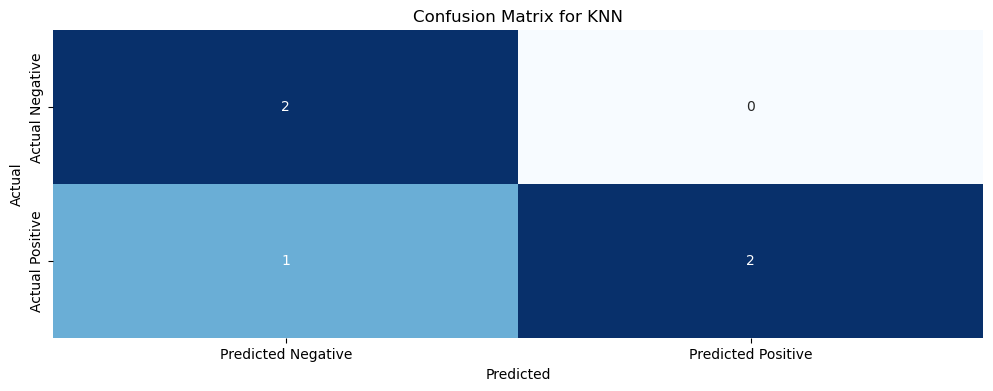

Note: The negative class (0) is 'Recall', while the positive class (1) is 'Maze'.


In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

show_kfold_cross_validation(knn_clf, X_train, y_train, X_test, y_test, 5)
show_confusion_matrix(y_test, y_pred_knn, "KNN")

### Logistic Regression

Cross-Validation Scores:
 Fold  Accuracy
    1  0.750000
    2  1.000000
    3  0.714286
    4  1.000000
    5  1.000000

Mean Accuracy: 0.893
Test Accuracy: 0.800
Confusion Matrix for Logistic Regression
[[2 0]
 [1 2]]


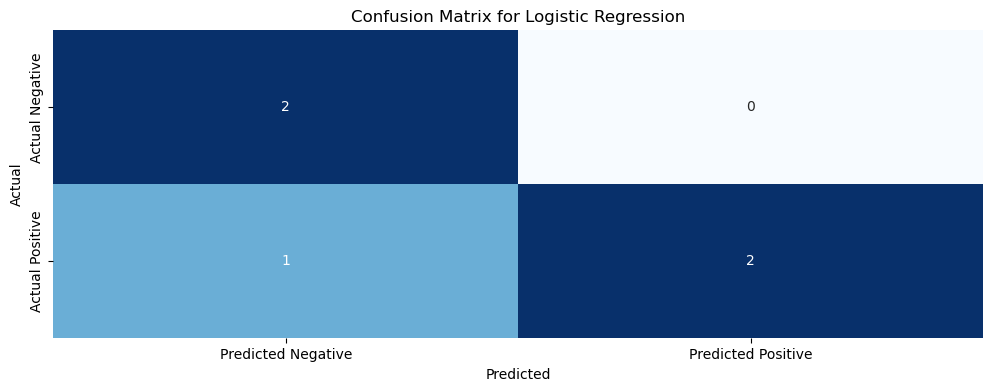

Note: The negative class (0) is 'Recall', while the positive class (1) is 'Maze'.


In [14]:
from sklearn.linear_model import LogisticRegression

reg_model = LogisticRegression(max_iter=1000)
reg_model.fit(X_train, y_train)
y_pred_reg = reg_model.predict(X_test)

show_kfold_cross_validation(reg_model, X_train, y_train, X_test, y_test, 5)
show_confusion_matrix(y_test, y_pred_reg, "Logistic Regression")

### SVM

Cross-Validation Scores:
 Fold  Accuracy
    1  0.875000
    2  0.714286
    3  1.000000
    4  0.714286
    5  1.000000

Mean Accuracy: 0.861
Test Accuracy: 0.800
Confusion Matrix for SVM
[[2 0]
 [1 2]]


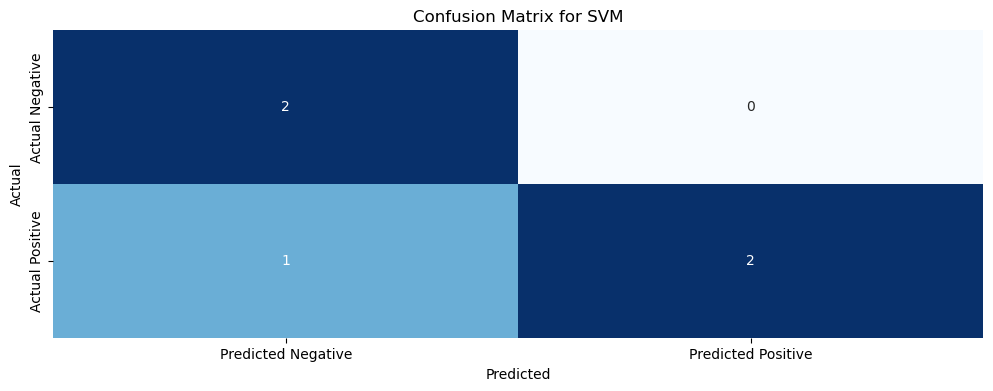

Note: The negative class (0) is 'Recall', while the positive class (1) is 'Maze'.


In [15]:
from sklearn.svm import SVC

svmrbf = SVC(kernel='rbf')
svmrbf.fit(X_train, y_train)
y_pred_svm = svmrbf.predict(X_test)

show_kfold_cross_validation(svmrbf, X_train, y_train, X_test, y_test, 5)
show_confusion_matrix(y_test, y_pred_reg, "SVM")

### Decision Tree Classifier

Cross-Validation Scores:
 Fold  Accuracy
    1       1.0
    2       1.0
    3       1.0
    4       1.0
    5       1.0

Mean Accuracy: 1.000
Test Accuracy: 1.000
Confusion Matrix for Decision Tree
[[2 0]
 [0 3]]


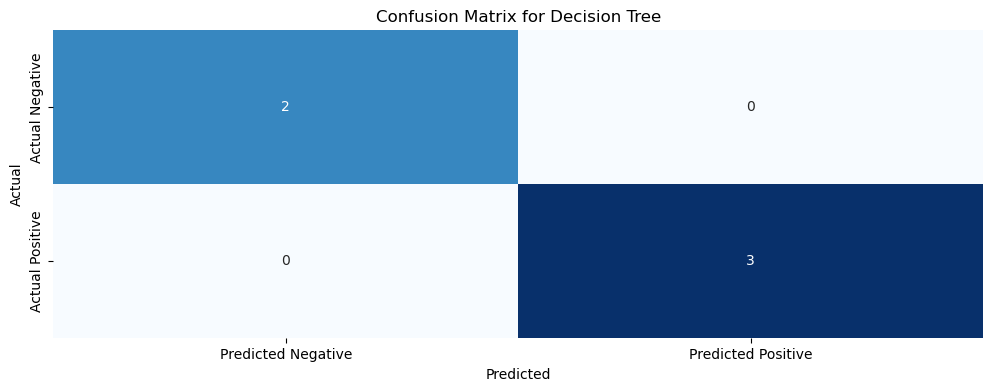

Note: The negative class (0) is 'Recall', while the positive class (1) is 'Maze'.


In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=10)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

show_kfold_cross_validation(dt_classifier, X_train, y_train, X_test, y_test, 5)
show_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

### Random Forest Classifier

Cross-Validation Scores:
 Fold  Accuracy
    1       1.0
    2       1.0
    3       1.0
    4       1.0
    5       1.0

Mean Accuracy: 1.000
Test Accuracy: 0.800
Confusion Matrix for Random Forest
[[2 0]
 [1 2]]


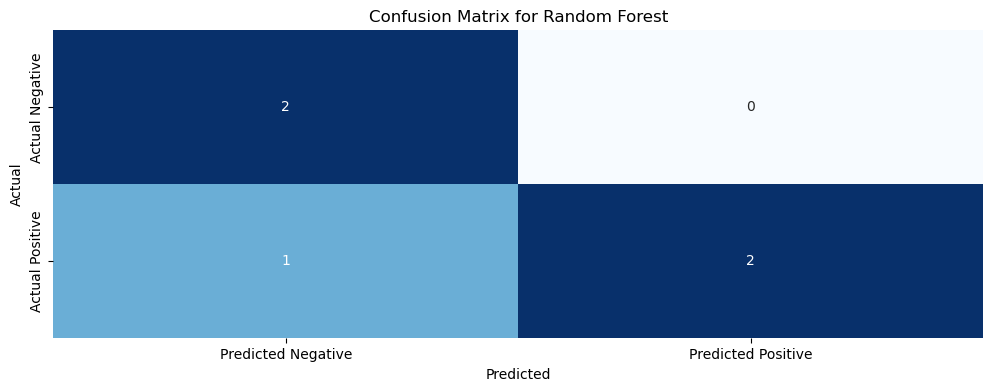

Note: The negative class (0) is 'Recall', while the positive class (1) is 'Maze'.


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(class_weight='balanced')
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

show_kfold_cross_validation(rf_classifier, X_train, y_train, X_test, y_test, 5)
show_confusion_matrix(y_test, y_pred_rf, "Random Forest")